In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [2]:
!apt-get update
!apt-get install -y iverilog

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,762 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,267 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd

Installing. Please wait... done!


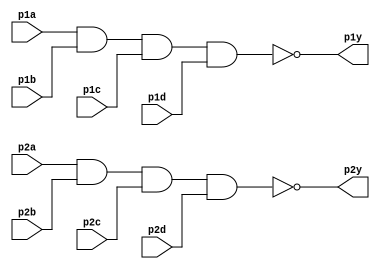

In [ ]:
#7420
%%print_verilog

module top_module (
    input p1a, p1b, p1c, p1d,
    output p1y,
    input p2a, p2b, p2c, p2d,
    output p2y );

    assign p1y = !(p1a & p1b & p1c & p1d);
    assign p2y = !(p2a & p2b & p2c & p2d);

endmodule


In [5]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg p1a_tb, p1b_tb, p1c_tb, p1d_tb, p2a_tb, p2b_tb, p2c_tb, p2d_tb; wire p1y_tb, p2y_tb;

  top_module top(.p1a(p1a_tb), .p1b(p1b_tb), .p1c(p1c_tb), .p1d(p1d_tb), .p2a(p2a_tb), .p2b(p2b_tb), .p2c(p2c_tb), .p2d(p2d_tb), .p1y(p1y_tb), .p2y(p2y_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 p1a_tb = 0; p1b_tb = 1; p1c_tb = 1; p1d_tb = 0; p2a_tb = 0; p2b_tb = 1; p2c_tb = 1; p2d_tb = 0;
    # 1 p1a_tb = 0; p1b_tb = 0; p1c_tb = 0; p1d_tb = 0; p2a_tb = 0; p2b_tb = 1; p2c_tb = 0; p2d_tb = 0;
    # 1 p1a_tb = 0; p1b_tb = 0; p1c_tb = 1; p1d_tb = 0; p2a_tb = 0; p2b_tb = 1; p2c_tb = 1; p2d_tb = 0;
    # 1 p1a_tb = 0; p1b_tb = 1; p1c_tb = 0; p1d_tb = 0; p2a_tb = 0; p2b_tb = 1; p2c_tb = 0; p2d_tb = 0;
    # 1 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module (
    input p1a, p1b, p1c, p1d,
    output p1y,
    input p2a, p2b, p2c, p2d,
    output p2y );

    assign p1y = !(p1a & p1b & p1c & p1d);
    assign p2y = !(p2a & p2b & p2c & p2d);

endmodule
//////////////////////////////////////////////////////////


VCD info: dumpfile tb.vcd opened for output.



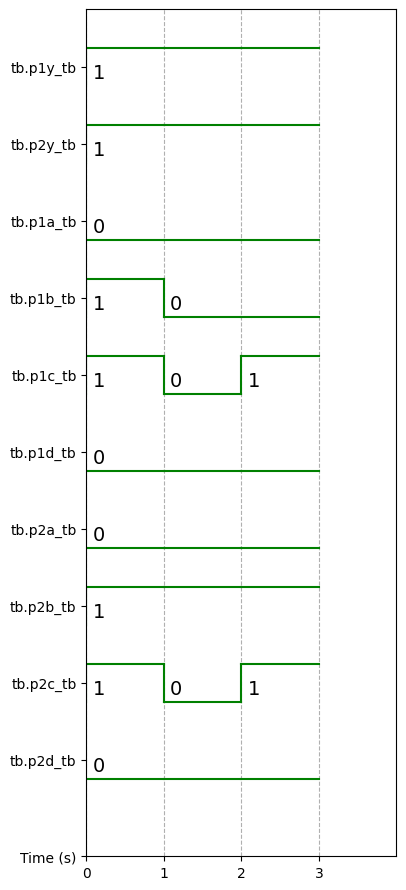

In [8]:
%%waveform tb.vcd
sign_list = ['tb.p1y_tb','tb.p2y_tb', 'tb.p1a_tb', 'tb.p1b_tb', 'tb.p1c_tb', 'tb.p1d_tb', 'tb.p2a_tb', 'tb.p2b_tb', 'tb.p2c_tb', 'tb.p2d_tb']
time_begin = 0
time_end = 3
base = 'dec' # bin, dec, dec2, hex, octal